In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn import datasets

import scipy.stats as st
from scipy import interpolate
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=[name.replace(' (cm)', '').replace(' ', '_') for name in iris['feature_names']])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
import scipy.stats as st
from scipy import interpolate
import matplotlib.patches as mpatches

def plot_outliers(data, attribute, quantiles = [0.95, 0.9, 0.5]):
    colors = ['r']+[plt.cm.summer(q**2) for q in quantiles]

    # select the data
    x = data[attribute].values

    # calculate the borders
    span = abs(x.max()) - abs(x.min())
    minimum = x.min() - 0.2*span
    maximum = x.max() + 0.2*span
    stepsize = (maximum-minimum)/1000.
    positions = np.arange(minimum, maximum, stepsize)

    # Kernel Density Estimate
    kernel = st.gaussian_kde(x)
    z = kernel(positions)
    normfactor = z.sum()  
    z /= normfactor

    # Integral for each threshold
    t = np.linspace(0, z.max(), 1000)
    integral = ((z >= t[:, None]) * z).sum(axis=1)
    f = interpolate.interp1d(integral, t)

    # get the thresholds for the quantiles
    t_contours = f(quantiles).tolist()

    # plot the distribution and the quantiles
    fig = plt.figure(figsize=(10,5))
    ax = fig.gca()

    # plot the quantiles
    for i, val in enumerate(t_contours):
        ax.fill_between(positions, z, where=z>=val, color=colors[i+1])
    # plot the outliers
    ax.fill_between(positions, z, where=z<t_contours[0], color=colors[0])
    # plot the curve
    ax.plot(positions, z, color="#777777")
    # plot rug
    bottom = -0.1*max(z)
    ax.plot(x, [bottom]*len(x), '|', color='k', markersize=40, alpha=0.4)
    ax.axhline(0.0, color='k')

    ax.set_xlabel(attribute)
    ax.set_ylabel('P(%s)' %attribute)
    ax.set_xlim(minimum, maximum)
    ax.set_ylim(bottom, 1.1*max(z))

    # generate a nice legend
    patches = []
    for c in colors:
        patches.append(mpatches.Patch(color=c, linewidth=0))
    plt.legend(patches, ['Outliers']+["%d%%" %(q*100) for q in quantiles], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    # outliers
    return data.iloc[kernel(data[attribute])/normfactor < t_contours[0]]

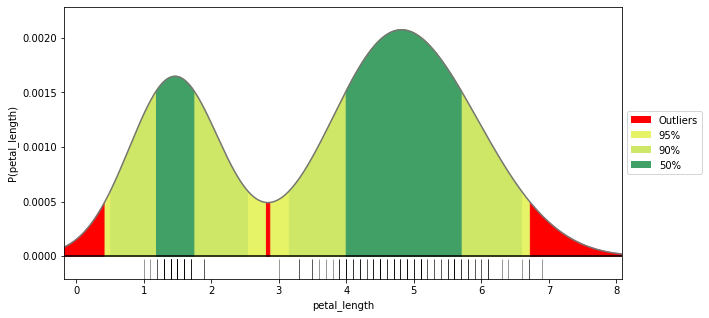

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3


In [4]:
outliers = plot_outliers(data, 'petal_length')
outliers

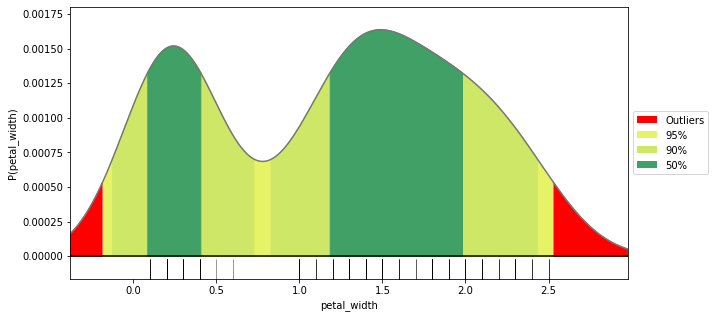

,sepal_length,sepal_width,petal_length,petal_width


In [5]:
outliers = plot_outliers(data, 'petal_width')
outliers

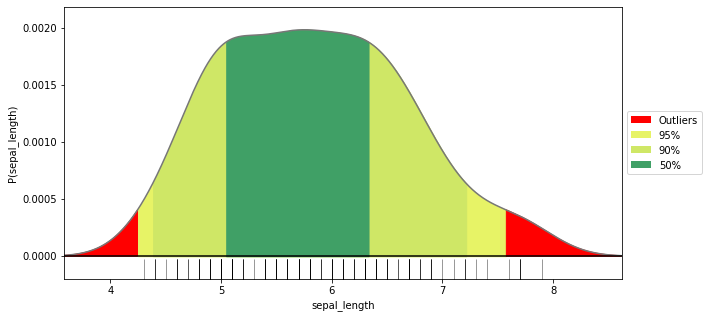

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
131,7.9,3.8,6.4,2.0
135,7.7,3.0,6.1,2.3


In [6]:
outliers = plot_outliers(data, 'sepal_length')
outliers

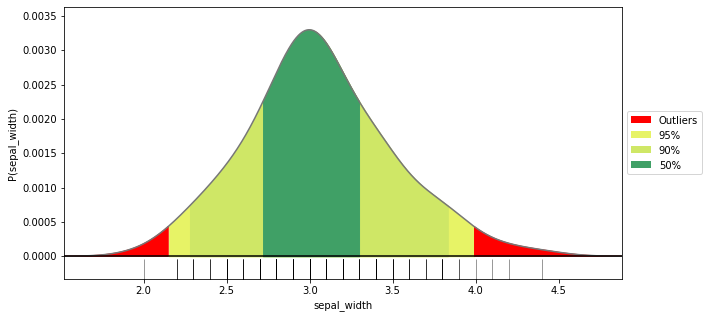

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [7]:
outliers = plot_outliers(data, 'sepal_width')
outliers